In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [83]:
iris = load_iris()

X = iris.data
y = iris.target

feature_names = iris.feature_names
class_names = iris.target_names

print(X.shape)
print(y.shape)

print(feature_names)
print(class_names)

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [84]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [88]:
# clf = DecisionTreeClassifier(
clf = RandomForestClassifier(
    n_estimators=100,
    criterion="entropy",
    min_samples_split=3,
    min_samples_leaf=3,
    max_depth=15,
)

clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=3)

In [86]:
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



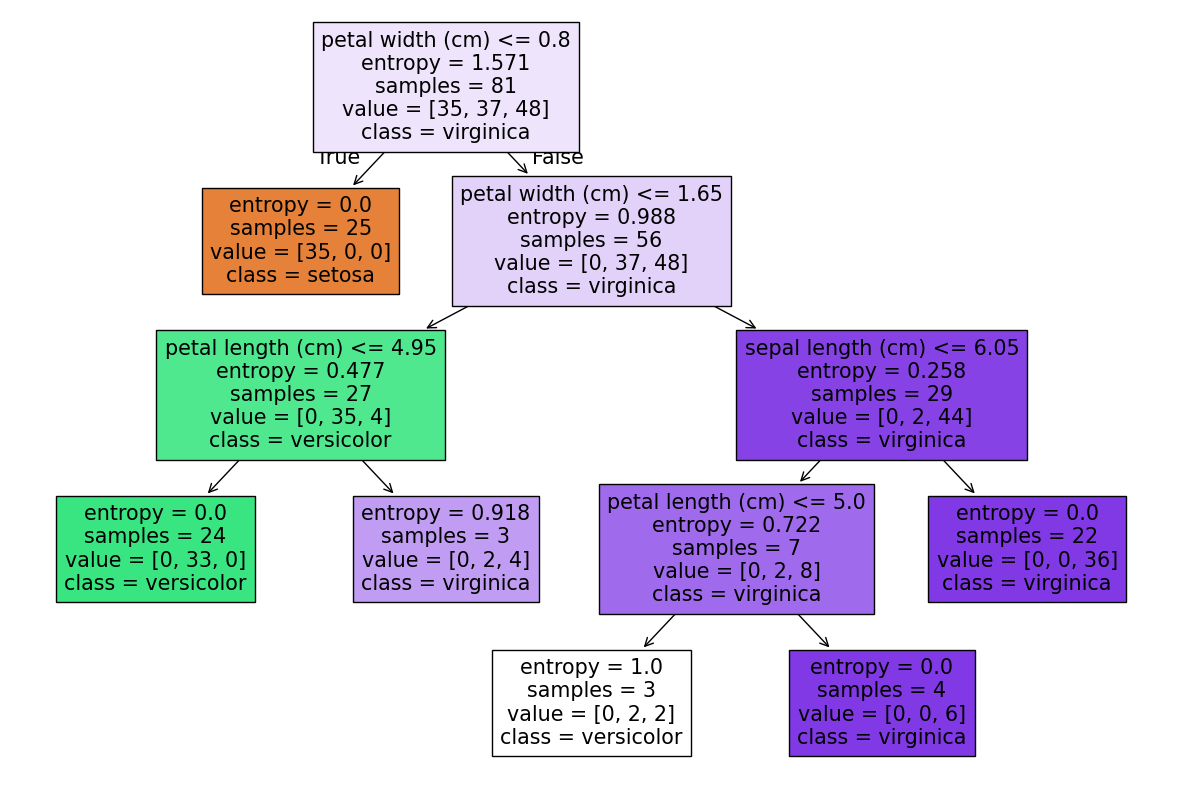

In [94]:
plt.figure(figsize=(15, 10))
plot_tree(clf.estimators_[2], feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

([<matplotlib.axis.YTick at 0x187275e82c0>,
 [Text(0, 0, 'sepal length (cm)'),
  Text(0, 1, 'sepal width (cm)'),
  Text(0, 2, 'petal width (cm)'),
  Text(0, 3, 'petal length (cm)')])

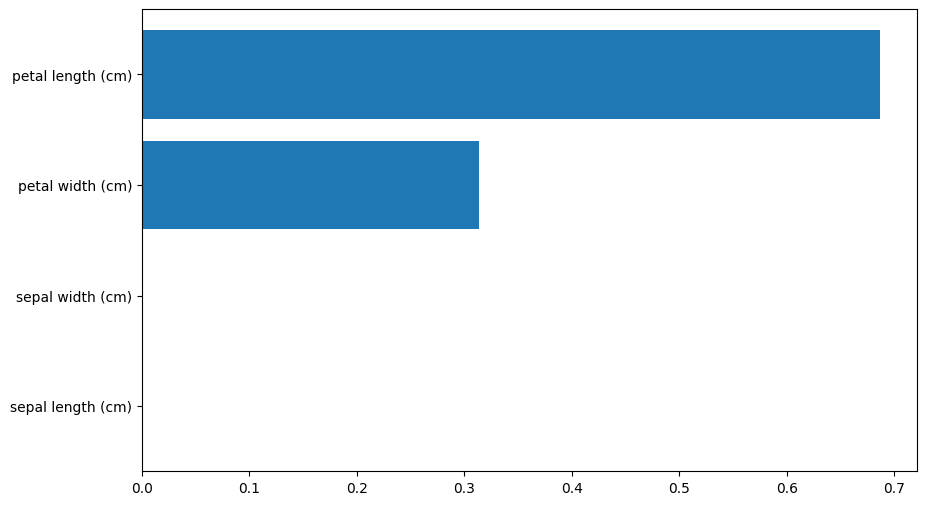

In [66]:
indexes = np.argsort(clf.feature_importances_)

fig = plt.figure(figsize=(10, 6))
plt.barh(range(len(indexes)), clf.feature_importances_[indexes], align='center')
plt.yticks(range(len(indexes)), [feature_names[i] for i in indexes])

<Axes: >

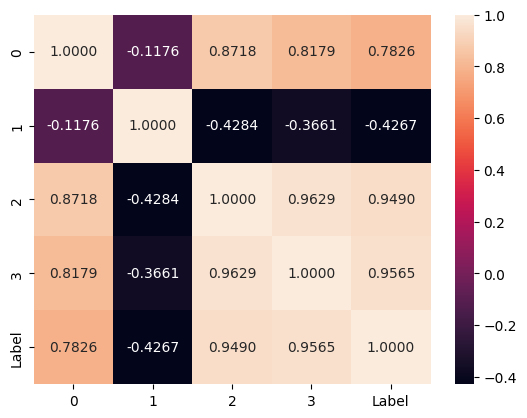

In [63]:
df = pd.DataFrame(X)
df["Label"] = y

sns.heatmap(df.corr(), annot=True, fmt="0.4f")

Text(50.722222222222214, 0.5, 'Target')

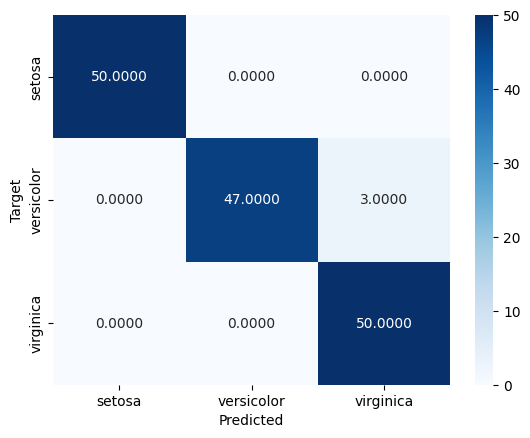

In [71]:
Dy_pred = clf.predict(X)
sns.heatmap(
    confusion_matrix(y, y_pred),
    annot=True,
    fmt="0.4f",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("Target")